# Linear regression

We wish to solve $Ax=b$ where A $\in$ $\mathbb{R}^{m\times n}$ and $m > n$. 

i.e. we wish to best satisfy the solution that solves m equations with n unknowns.

This is referred to as least squares method.

We use the normal equation. The shortcut to get there is to attach an $A^T$ on each side:

$A^TA x = A^Tb$

It can be derived two ways:

(1) geometrically as a projection, p, of vector b onto vector a:

i.e. $a \cdot (b - p) = a^Tb - a^Tp = 0$
and $p=\hat{x}a$

so $a^Ta\hat x = a^Tb$ which generalises to the matrix form.

(2) take the derivative w.r.t the parameters:

$\mathcal{L} = min||b - A\hat x||^2 = (b - A\hat x)^T(b - A\hat x)$

$\frac{d\mathcal{L}}{d\hat x} = -2b^T + 2(A\hat x)^T A = 0$

move to one side then transpose both sides gives the normal equation: 

$A^TA\hat x = A^Tb$

In [143]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [144]:
np.random.seed(14)
n_features = 1
X, y = make_regression(n_samples=200, n_features=n_features, n_informative=n_features)
X += np.random.normal(0,0.5,X.shape)

In [149]:
class LinearRegressionNumpy():
    def __init__(self, intercept=True):
        self.params_ = 0
        self.intercept = intercept
        
    def train(self, X, y):
        if self.intercept:
            A = np.array([np.ones(len(X))] + [X[:,i] for i in range(X.shape[1])]).T
        else:
            A = X
            
        b = y
        self.params_ = A.T @ b @ np.linalg.inv(A.T @ A)
    
    def predict(self, X):
        if self.intercept:
            A = np.array([np.ones(len(X))] + [X[:,i] for i in range(X.shape[1])]).T
        else:
            A = X

        y_pred = A @  self.params_
        return y_pred

In [150]:
reg = LinearRegressionNumpy()

reg.train(X, y)
x_pred = np.linspace(-3,3, 200).reshape(-1,1)
y_pred = reg.predict(x_pred)

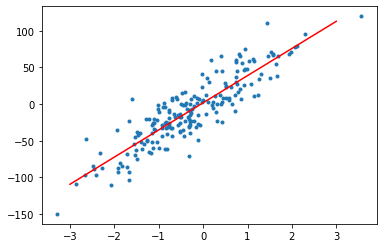

In [151]:
plt.plot(X, y, '.')
plt.plot(x_pred, y_pred, 'r')

In [152]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression().fit(X, y)
reg2_params = np.array([reg2.intercept_, reg2.coef_[0]])
np.isclose(reg.params_, reg2_params, rtol=1e-10)

array([ True,  True])